# 데이터 로드 

In [2]:
w2v = {}
with open("ko.vec",encoding='utf-8') as vecfile:
    print(vecfile.readline())
    while True:
        line = vecfile.readline().split()
        if len(line) == 0:
            break
        w2v[line[0]] = line[1:]

30186 200



In [27]:
from konlpy.tag import Twitter
import math
import numpy as np

def load_file(filesrc):
    f = open(filesrc, 'rt', encoding='utf-16')
    talk = []
    not_person = ['al', 'ot']
    talk_all = []
    while(True):
        data = f.readline() 
        if not data: break

        if("<u who=" in data or "<s n=" in data):
            # 발화자 구분
#                 if "who" in data:
#                     name = data[8:10]
#                     if name in not_person:
#                         continue
#                     if not (name in speak):
#                        speak[name] = [] 

            # 대화 추출
            temp = data.split(">")
            s = ""
            for v in temp:
                idx = v.find('<')
                if idx < 2: continue
#                     speak[name].append(v[:idx])
                talk_all.append(v[:idx])

    return _,talk_all

def words_join(words,doc_index):
    word_idx = []
    doc_count = 0
    for index,lines in enumerate(words):
        if len(doc_index) > doc_count and index >= doc_index[doc_count]:
            doc_count += 1
        word_idx += [[v,index,doc_count] for v in lines.split(' ')]

    return np.array(word_idx)

def postaging(docs):
    twitter=Twitter()
    want = ['Exclamation','Adverb','Noun','Alpha','Verb','Adjective']
    stopword = ['어어','넷','만','것','타','최','태','개','홈','선','끼','각','번','하다','음','화', '이다',' ','다','더','포','제','저','여기','고','씬','첨','난','면','으루','네']
    pos = []

    for lines in docs:
        strs=""
        for t in twitter.pos(lines, norm=True, stem=True):
            if (t[1] in want) and (t[0] not in stopword):
#             if (t[0] not in stopword) and len(t[0]) > 1:
#             if (t[0] not in stopword):
#                 pos = pos + " " + t[0]
                pos.append(t[0])
#                 strs = strs + " " + t[0]
#         if strs[1:]:
#             pos.append(strs[1:])

    return pos



def words_join(words,doc_index):
        word_idx = []
        doc_count = 0
        for index,lines in enumerate(words):
            if len(doc_index) > doc_count and index >= doc_index[doc_count]:
                doc_count += 1
            word_idx += [[v,index,doc_count] for v in lines.split(' ')]
            
        return np.array(word_idx)

# 클러스터링 작업하기

In [37]:
#비교할 데이터 로드
load_list = ["6CM00079-학교.txt","6CM00080-군대.txt","6CM00082-정치.txt"]
talk_list = []
speak_list = []
doc_index = []
word_list = []
#load는 리스트 형태  , 한번에 여러문서도가능하도록 --> 나중에는 db형식으로 교체 필요
for path in load_list:
    _,talks = load_file(path)
    talk_list= talk_list + talks
    word_list = word_list+postaging(talk_list)
#     word_list = word_list.append(postaging(talk_list))
    doc_index.append(len(word_list)-1)

# print("doc_index : ",doc_index)
# 포스테깅 및 stopword 처리 
# word_list = postaging(talk_list)
print(doc_index)
print(word_list)
words = words_join(word_list,doc_index)

[2574, 14556, 28253]
['교생실습', '가다', '온', '얘기', '해', '드리다', '그렇다', '되게', '궁금하다', '아', '그렇다', '갖다', '저희', '교생', '되게', '많다', '인제', '나이', '제일', '어리다', '생각', '나이', '많다', '사람', '되게', '많다', '언니', '구오', '구오', '학번', '아유', '그렇다', '얘기', '구오', '학번', '막', '그렇다', '갖다', '근데', '졸업', '사', '년', '안', '돼다', '나다', '되게', '어리다', '생각', '애', '보', '세대', '차이', '엄청', '나', '거', '걔네', '정말', '걔', '메일', '보내다', '진짜', '못', '읽다', '거', '막', '읽다', '줄', '알다', '머', '아리', '용', '아리', '용이', '무슨', '뜻', '아리', '용', '선생님', '아리', '용', '맨날', '그렇다', '무슨', '말', '몰르다', '가지', '모르다', '사투리', '아니다', '어', '아니다', '아니다', '선생님', '아룡', '어', '아룡', '어', '아리', '용', '맨날', '아리', '영', '아리', '영', '그거', '아니다', '인어', '아가씨', '나오다', '거', '그렇다', '가지', '맨날', '그렇다', '어', '특수문자', '엄청', '많이', '쓰다', '문자', '보내다', '알아보다', '수가', '없다', '막', '그렇다', '문자', '쓰다', '인기', '많다', '아예', '문자', '자다', '안', '오다', '막', '남자', '교생', '걔네', '음료수', '맨날', '뽑다', '여자', '중학교', '여자', '고등학교', '고등학교', '그렇다', '이해', '주다', '걔네', '정말', '남자', '교생', '쌓다', '먹다', '우리', '뽑다', '먹다', '남자', '교생', '안', '

In [83]:
term = 50
doc_size = 300
cluster_word = []
vector_size = 200

cluster_word = [words[i:i+doc_size] for i in  range(0,len(words),term) if i+doc_size < len(words)]
# print("cluster_word[0] : ",cluster_word[0])
# print(len(cluster_word))
# print(cluster_word)
# print(len(words))
cluster_word_vector = []

for words_list in cluster_word:
    sum = np.zeros(vector_size,dtype=float)
#     print(words_list)
    for v in [w2v[vector[0]] for vector in words_list if vector[0] in w2v]:
        #형변환 필요
        v = [float(i) for i in v]
        sum = np.add(sum,v)
    cluster_word_vector.append(sum)

In [84]:
from sklearn.metrics.pairwise import cosine_similarity
cluster_word_similarity =  cosine_similarity(cluster_word_vector,cluster_word_vector)
test = [v[i+1:i+2] for i,v in enumerate(cluster_word_similarity)]

(560, 3)
[['교생실습' '0' '0']
 ['세대' '50' '0']
 ['아리' '100' '0']
 ['걔네' '150' '0']
 ['게' '200' '0']
 ['요즘' '250' '0']
 ['애' '300' '0']
 ['부모' '350' '0']
 ['중' '400' '0']
 ['친구' '450' '0']]


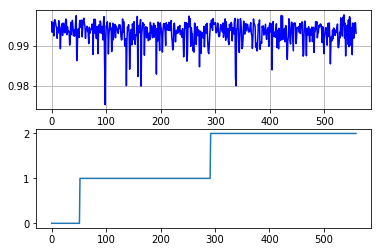

In [85]:
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inlince
words_chart = [words[i] for i in  range(0,len(words),term) if i+doc_size < len(words)]
words_chart = np.array(words_chart)
print(words_chart.shape)
print(words_chart[:10])
# print(words_chart[:])
flg = plt.figure()
x1 = flg.add_subplot(2, 1, 1)

x1.plot(test[:-1],color='blue')
x1.grid(True)

x2 = flg.add_subplot(2, 1, 2)
x2.plot(words_chart[:,[2]])
# plt.figure(figsize=(30, 20))
plt.show()

# 클러스터링 작업

### 클러스터링1

In [86]:
def cluster_boundary1(similarity,repeat,min,cluster_value,term):
    index=[]
    sim = similarity[:]
    #repeat 만큼 반복해서 걸러내기
    for rpt in range(repeat):
        sim.sort()
        # min%만큼 낮은값만 뽑아내는 작업
        index = [similarity.index(i) for i in sim[:int(len(sim)*(min/100))]]
        sim = [similarity[i] for i in index]
    
    index.sort()
    print(index)
#     print(len(similarity))
    # 가까이있는값은 하나로 묶기 (cluster_value)
    indexing = [v  for i,v in enumerate(index) if (v-index[i-1])/min > cluster_value]
#     print(index)
#     print(indexing)
#     print(len(similarity))
    
    #노이즈로 생각되는값 뽑기

    # 노이즈 체크 공식 (suhyuns-sim) 전체길이  * min 퍼센트 ^ repeat 수
    # term 으로 체크시 뒤에 노이즈범위 값안에 들어가는만큼 노이즈 count 증가 이걸 noise_check로 비율 넣기
    noise_check = int(math.sqrt(len(similarity)*pow((min/100),2)))
#     print(noise_check)
#     print(index)
    noise_count = []
    for i in indexing:
        check = 0
        idx = index.index(i)
#         print(idx)
        while(True):
            if idx+check >= len(index)-1 or index[idx+check+1] - index[idx] > term:
                break
            check +=1
        noise_count.append(check/noise_check)
    
    return indexing,noise_count

#0에 가까울수록 클러스터 포인트 1넘으면 100% 아님으로보면될듯

cluster_boundary1(test[:-1],2,40,0.5,term)

[16, 33, 46, 47, 68, 76, 85, 97, 98, 104, 110, 111, 134, 135, 137, 143, 144, 147, 153, 158, 164, 170, 192, 198, 203, 209, 222, 223, 227, 242, 243, 248, 249, 255, 259, 260, 261, 265, 271, 274, 280, 287, 288, 289, 324, 325, 337, 338, 343, 344, 349, 350, 368, 374, 375, 376, 377, 382, 383, 384, 385, 398, 404, 413, 416, 428, 431, 432, 438, 443, 448, 461, 462, 467, 473, 478, 481, 496, 499, 505, 511, 525, 526, 527, 539, 543, 545, 549, 551]


([68, 134, 192, 324], [0.7777777777777778, 1.0, 0.7777777777777778, 1.0])

### 클러스터링2 최대최소 비율

In [87]:
def cluster_boundary2(similarity,repeat,min_rate,cluster_value,term):
    index=[]
    sim = similarity[:]
    #repeat 만큼 반복해서 걸러내기
    for rpt in range(repeat):
        #최대최소 안뽑혀서 일단 이걸로 ';;
#         sim.sort()
        min_value = min(sim)
        max_value = max(sim)
        #  max - (max-min)(1-min_ratio/100)
        compare_rate = max_value - (max_value-min_value)*(1-min_rate/100)
#         print("min :",min_value)
#         print("max :",max_value)
#         print("compare_rate :",compare_rate)
        
        # min%만큼 낮은값만 뽑아내는 작업
        index = [similarity.index(i) for i in sim if i< compare_rate]
        sim = [similarity[i] for i in index]
    
    index.sort()
    # 가까이있는값은 하나로 묶기 (cluster_value)
    indexing = [v  for i,v in enumerate(index) if (v-index[i-1])/len(similarity) > cluster_value or i+1 == len(index)]

    #노이즈로 생각되는값 뽑기
    # 노이즈 체크 공식 (suhyuns-sim) 전체길이  * min 퍼센트 ^ repeat 수
    # term 으로 체크시 뒤에 노이즈범위 값안에 들어가는만큼 노이즈 count 증가 이걸 noise_check로 비율 넣기
    
    noise_check = math.sqrt(len(similarity)*pow((min_rate/100),2))
#     print("noise_check : ",noise_check)
    noise_count = []
#     print("index : ",index)
#     print("indexing :",indexing)
    for i in indexing:
        check = 0
        idx = index.index(i)
#         print(idx)
        while(True):
            if idx+check >= len(index)-1 or index[idx+check+1] - index[idx] > term:
                break
            check +=1
        noise_count.append(check/noise_check)
    
    return indexing,noise_count

#0에 가까울수록 클러스터 포인트 1넘으면 100% 아님으로보면될듯

cluster_boundary2(test[:-1],2,40,.04,term)

([98], [0.0])